In [1]:
# Step 1. 구글코랩에 한글 폰트 설정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,712 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [2]:
# Step 2. 구글 코랩으로 파일 불러오기

from google.colab import files
myfile = files.upload()

Saving 수박과참외.csv to 수박과참외.csv


In [8]:
import io
import pandas as pd
# pd.read_csv로 CSV 파일 불러오기
src_data = pd.read_csv(io.BytesIO(myfile['수박과참외.csv']),encoding='cp949')
src_data

,종류,무게,길이
0,수박,2000,30.0
1,수박,2500,25.0
2,수박,1800,20.0
3,수박,1500,16.0
4,수박,900,10.0
5,수박,2500,33.0
6,수박,2250,23.0
7,수박,1860,17.0
8,수박,2100,21.0
9,수박,1500,17.0


In [9]:
# 수박과 참외의 무게와 길이 데이터 생성

수박정보 = src_data.loc[(src_data['종류']=='수박'),['무게','길이']]
참외정보 = src_data.loc[(src_data['종류']=='참외'),['무게','길이']]

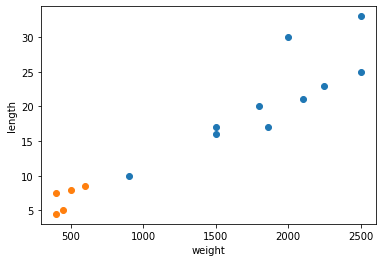

In [11]:
# 그래프로 데이터의 분포 확인하기
import matplotlib.pyplot as plt

plt.scatter(수박정보.무게, 수박정보.길이)
plt.scatter(참외정보.무게, 참외정보.길이)

plt.xlabel('weight')
plt.ylabel('length')
plt.show()

In [12]:
# KNN이 좋아하는 형태로 만들기
import numpy as np
data = np.column_stack((src_data.무게, src_data.길이))
target = src_data.종류

In [13]:
# 훈련용 데이터와 테스트용 데이터로 나누기

from sklearn.model_selection import train_test_split
훈련용_data, 테스트용_data, 훈련용_target, 테스트용_target = train_test_split(data, target, random_state=40)
print(훈련용_data.shape, 테스트용_data.shape)

(11, 2) (4, 2)


In [14]:
# KNN 알고리즘으로 분석하여 모델 만들고 성능 확인하기
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(훈련용_data , 훈련용_target)
kn.score(테스트용_data, 테스트용_target)

1.0

In [15]:
# 예측하기
print(kn.predict([[1000,15]]))

['수박']


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend

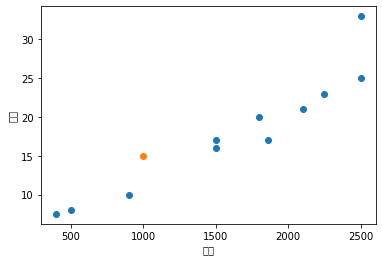

In [16]:
# 그래프로 데이터의 분포 확인하기

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.scatter(훈련용_data[:,0], 훈련용_data[:,1])
plt.scatter(1000, 15, marker='o')
plt.xlabel('무게')
plt.ylabel('길이')
plt.show()

In [18]:
# 데이터 표준화하기

mean = np.mean(훈련용_data, axis=0)
std = np.std(훈련용_data, axis=0)
훈련데이터_표준점수 = (훈련용_data - mean) / std

훈련데이터_표준점수

array([[-0.16756769, -0.26637773],
       [-0.16756769, -0.13009145],
       [-1.01180185, -1.08409542],
       [ 1.23948925,  0.9601988 ],
       [ 0.25454939,  0.27876739],
       [-1.57462462, -1.35666798],
       [ 0.67666647,  0.41505367],
       [ 1.23948925,  2.05048905],
       [ 0.33897281, -0.13009145],
       [-1.71533032, -1.42481112],
       [ 0.88772501,  0.68762624]])

In [20]:
# 표준화한 데이터를 학습하기

테스트데이터_표준점수 = ((테스트용_data) - mean) / std
찾는과일 = ([1000,15] - mean) / std

kn.fit(훈련데이터_표준점수, 훈련용_target)
kn.score(테스트데이터_표준점수, 테스트용_target)
print(kn.predict([찾는과일]))
distances, indexes = kn.kneighbors([찾는과일])

['수박']


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text

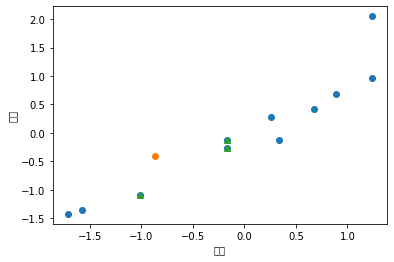

In [21]:
# 어떤 데이터를 참고했는지 그래프로 확인

plt.scatter(훈련데이터_표준점수[:,0], 훈련데이터_표준점수[:,1])
plt.scatter(찾는과일[0], 찾는과일[1], marker='o')
plt.scatter(훈련데이터_표준점수[indexes,0], 훈련데이터_표준점수[indexes,1], marker='^')
plt.xlabel('무게')
plt.ylabel('길이')
plt.show()

findfont: Font family ['Nanum'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py

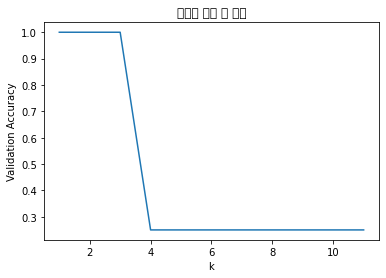

In [23]:
# 최적의 이웃 개수 찾기

k_list = range(1,12)
accuracies = []

for k in k_list :
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(훈련용_data, 훈련용_target.values.ravel())
  accuracies.append(classifier.score(테스트용_data, 테스트용_target))

plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('최적의 이웃 값 찾기')
plt.show()